In [4]:
import sys
sys.path.append("./../build")
import ODModule as bm

In [7]:
time_step = 0.01
n_steps = 1000000

# performance test using lambdas from python
print("===== Performance test using lambdas =====")
# init_pos = bm.position([0])
func = lambda pos: -4 * pos[0] * (pos[0] * pos[0] - 1)
odl = bm.OverdampedLangevin(1, func, [0])

import time
start = time.time()
res = odl.getTrajectory(n_steps, time_step)
end = time.time()
print("Time elapsed: ", end-start)


# performance test not using lambdas from python
print("===== Performance test without lambdas =====")
init_pos = [0]
odl = bm.OverdampedLangevin(1, init_pos)

import time
start = time.time()
res = odl.getTrajectory(n_steps, time_step)
end = time.time()
print("Time elapsed: ", end-start)

===== Performance test using lambdas =====
Time elapsed:  0.41318798065185547
===== Performance test without lambdas =====
Time elapsed:  0.06490802764892578


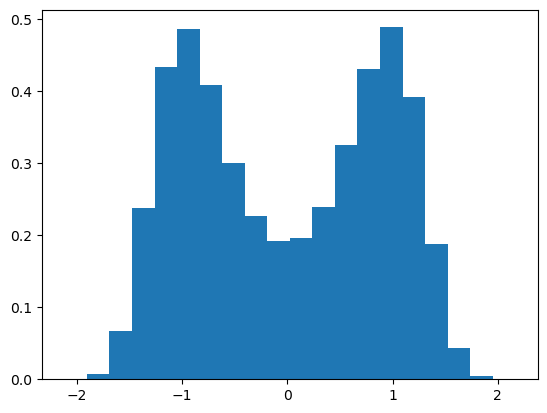

In [8]:
from matplotlib import pyplot as plt
_ = plt.hist(res, bins=20, density=True)

In [10]:
init_pos = [[0]] * 8

force_func = lambda pos: -4 * pos[0] *(pos[0]**2 - 1)
odl = bm.BatchedOverdampedLangevin(1, init_pos)

time_step = 0.01
n_steps = 1000000

import time
time_start = time.time()
traj = odl.getBatchedTrajectory(n_steps, time_step)
time_end = time.time()
print("Time elapsed: ", time_end - time_start)

Time elapsed:  0.13882899284362793
